In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [ ]:
# Load the Posts CSV
# posts_df = pd.read_csv('./output/stackoverflow/Posts.csv')

chunk_size = 50000  # This is an example size, adjust based on your system capabilities
chunks = []  # This list will store the filtered data from each chunk

# Define the regex pattern for Python tags
python_tag_pattern = re.compile(r'\b\w*python\w*\b', re.IGNORECASE)
python_file_pattern = re.compile(r'\b\.py\b', re.IGNORECASE)

for chunk in pd.read_csv('./output/stackoverflow/Posts.csv', chunksize=chunk_size):
    # Filter by tags, titles, and text using the regex patterns
    filtered_chunk = chunk[
        chunk['Tags'].str.contains(python_tag_pattern, na=False) |
        chunk['Title'].str.contains(python_tag_pattern, na=False) |
        chunk['Body'].str.contains(python_tag_pattern, na=False) |
        chunk['Title'].str.contains(python_file_pattern, na=False) |
        chunk['Body'].str.contains(python_file_pattern, na=False) 
    ]

    # Append the filtered chunk to the list
    chunks.append(filtered_chunk)

df_posts = pd.concat(chunks)
# df_posts.to_pickle("./dfpython.pkl")  

In [4]:
df_posts = pd.read_pickle('./df_posts.pkl')
df_posts.head()

,Id,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ContentLicense
150,307,2,260.0,NaN,2008-08-02T01:49:46.220,43,NaN,"<p><a href=""https://www.codeproject.com/Articl...",49.0,2019-12-24T07:28:19.907,NaN,NaN,NaN,3,NaN,CC BY-SA 4.0
160,337,1,NaN,342.0,2008-08-02T03:35:55.697,82,10424.0,<p>I am about to build a piece of a project th...,111.0,2021-11-12T18:56:21.143,XML Processing in Python,<python><xml>,12.0,1,0.0,CC BY-SA 3.0
162,342,2,337.0,NaN,2008-08-02T04:01:34.600,36,NaN,"<p>Personally, I've played with several of the...",59.0,2008-08-02T04:01:34.600,NaN,NaN,NaN,1,NaN,CC BY-SA 2.5
195,469,1,NaN,3040.0,2008-08-02T15:11:16.430,48,4837.0,<p>I am using the Photoshop's javascript API t...,147.0,2022-12-15T07:51:30.287,How can I find the full path to a font from it...,<python><macos><fonts><photoshop>,6.0,0,NaN,CC BY-SA 3.0
197,471,2,337.0,NaN,2008-08-02T15:21:03.587,33,NaN,"<p><a href=""http://effbot.org/zone/element-ind...",147.0,2008-08-02T15:21:03.587,NaN,NaN,NaN,2,NaN,CC BY-SA 2.5


### Read in `Comments.csv`, `PostLinks.csv`, and `Users.csv`

but only rows that are related to our python related Posts DataFrame (either OwnerUserId, or Posts Id)

In [5]:
# Create a Set of Relevant User IDs 
unique_user_ids = set(df_posts['OwnerUserId'].unique())

In [ ]:
# Filter Other CSV Files While Reading them

# Comments
chunk_size = 50000  # Example chunk size, adjust as needed
filtered_comments_chunks = []

for chunk in pd.read_csv('./output/stackoverflow//Comments.csv', chunksize=chunk_size):
    filtered_chunk = chunk[chunk['UserId'].isin(unique_user_ids)]
    filtered_comments_chunks.append(filtered_chunk)

df_comments = pd.concat(filtered_comments_chunks)

In [ ]:
# Users
user_cols = ['Id', 'Reputation', 'CreationDate', 'LastAccessDate', 'Views', 'UpVotes', 'DownVotes']

filtered_users_chunks = []

for chunk in pd.read_csv('./output/stackoverflow//Users.csv', chunksize=chunk_size, usecols=user_cols):
    filtered_chunk = chunk[chunk['Id'].isin(unique_user_ids)]
    filtered_users_chunks.append(filtered_chunk)

df_users = pd.concat(filtered_users_chunks)

In [ ]:
# PostLinks
post_links_cols = ['Id', 'CreationDate', 'PostId', 'RelatedPostId', 'LinkTypeId']

unique_post_ids = set(df_posts['Id'].unique())  # Unique post IDs from filtered posts
filtered_postlinks_chunks = []

for chunk in pd.read_csv('./output/stackoverflow//PostLinks.csv', chunksize=chunk_size, usecols=post_links_cols):
    filtered_chunk = chunk[
        chunk['PostId'].isin(unique_post_ids) |
        chunk['RelatedPostId'].isin(unique_post_ids)
    ]
    filtered_postlinks_chunks.append(filtered_chunk)

df_postlinks = pd.concat(filtered_postlinks_chunks)

In [ ]:
# Tags
tags_cols = ['Id', 'TagName', 'Count']

#df_tags = pd.read_csv('./output/Tags.csv', usecols=tags_cols)
tags_chunks = []

for chunk in pd.read_csv('./output/stackoverflow/Tags.csv', chunksize=chunk_size, usecols=tags_cols):
    tags_chunks.append(chunk)

df_tags = pd.concat(tags_chunks)

In [5]:
# df_comments.to_pickle("./df_comments.pkl")
# df_users.to_pickle("./df_users.pkl")
# df_postlinks.to_pickle("./df_postlinks.pkl")
# df_tags.to_pickle("./df_tags.pkl")

In [6]:
# Read dataframes from pickle files
df_posts = pd.read_pickle('./df_posts.pkl')

post_cols = [
    'Id', 'PostTypeId', 'ParentId', 'AcceptedAnswerId', 'CreationDate', 
    'Score', 'ViewCount', 'Body', 'OwnerUserId', 'LastActivityDate', 
    'Title', 'Tags', 'AnswerCount', 'CommentCount'
]

df_posts = df_posts[post_cols]

In [7]:
# Read dataframes from pickle files
df_comments = pd.read_pickle('./df_comments.pkl')
comment_cols = ['Id', 'PostId', 'Score', 'Text', 'CreationDate', 'UserId']

df_comments = df_comments[comment_cols]

In [8]:
# Read dataframes from pickle files
df_posts_links = pd.read_pickle('./df_postlinks.pkl')
df_tags = pd.read_pickle('./df_tags.pkl')
df_users = pd.read_pickle('./df_users.pkl')

### Typecasting

In [9]:
if df_comments.isnull().sum().any():
    print('df_comments.isnull().sum()', '\n', df_comments.isnull().sum()[df_comments.isnull().sum() > 0], '\n', sep='')

if df_posts.isnull().sum().any():
    print('df_posts.isnull().sum()', '\n', df_posts.isnull().sum()[df_posts.isnull().sum() > 0], '\n', sep='')

if df_posts_links.isnull().sum().any():
    print('df_posts_links.isnull().sum()', '\n', df_posts_links.isnull().sum()[df_posts_links.isnull().sum() > 0], '\n', sep='')

if df_tags.isnull().sum().any():
    print('df_tags.isnull().sum()', '\n', df_tags.isnull().sum()[df_tags.isnull().sum() > 0], '\n', sep='')

if df_users.isnull().sum().any():
    print('df_users.isnull().sum()', '\n', df_users.isnull().sum()[df_users.isnull().sum() > 0], '\n', sep='')


df_comments.isnull().sum()
Text    3
dtype: int64

df_posts.isnull().sum()
ParentId            2627187
AcceptedAnswerId    2498319
ViewCount           1184829
Body                      5
OwnerUserId           68184
Title               1184679
Tags                1184707
AnswerCount         1184829
dtype: int64

df_tags.isnull().sum()
TagName    2
dtype: int64



### Missing values

In [10]:
if df_comments.isnull().sum().any():
    print('df_comments.isnull().sum()', '\n', df_comments.isnull().sum()[df_comments.isnull().sum() > 0], '\n', sep='')

if df_posts.isnull().sum().any():
    print('df_posts.isnull().sum()', '\n', df_posts.isnull().sum()[df_posts.isnull().sum() > 0], '\n', sep='')

if df_posts_links.isnull().sum().any():
    print('df_posts_links.isnull().sum()', '\n', df_posts_links.isnull().sum()[df_posts_links.isnull().sum() > 0], '\n', sep='')

if df_tags.isnull().sum().any():
    print('df_tags.isnull().sum()', '\n', df_tags.isnull().sum()[df_tags.isnull().sum() > 0], '\n', sep='')

if df_users.isnull().sum().any():
    print('df_users.isnull().sum()', '\n', df_users.isnull().sum()[df_users.isnull().sum() > 0], '\n', sep='')

df_comments.isnull().sum()
Text    3
dtype: int64

df_posts.isnull().sum()
ParentId            2627187
AcceptedAnswerId    2498319
ViewCount           1184829
Body                      5
OwnerUserId           68184
Title               1184679
Tags                1184707
AnswerCount         1184829
dtype: int64

df_tags.isnull().sum()
TagName    2
dtype: int64



**Trying to explain the missing values**


**`df_comments`**
- `UserId` is absent if the user has been deleted 

**`df_posts`**
- `ParentId` only present if PostTypeId = 2
- `AcceptedAnswerId` only present if PostTypeId = 1
- `ViewCount` only present if PostTypeId = 1
- `Body` not present in some PostTypeId = [4,5]. We will only look at PostTypeId = [1,2]
    - PostTypeId = 1: Question
    - PostTypeId = 2: Answer
    - PostTypeId = 4: Tag wiki excerpt
    - Check documentation
- `OwnerUserId` only present if user has not been deleted
- `Title` question title only present if PostTypeId = 1
- `Tags` question tags only present if PostTypeId = 1    
- `AnswerCount` only present if PostTypeId = 1

**How we will take action**

**`df_comments`**
- `UserId`: Before we remove comments from deleted users, we want to calculate average sentiment of threads users engage in. To calculate the average sentiment polarity of a thread, we want to include every user's comments. We therefore temporarily replace missing `UserId` with (-1).

**`df_posts`**
- We're only interested in PostTypeId 1 (Question) and 2 (Answer), so we filter out other types.
- For the below columns which are conditionally present, we fill missing values with a placeholder (-1 or 'Comment: N/A') 
    - ParentId, 
    - AcceptedAnswerId, 
    - ViewCount, 
    - Title, 
    - Tags, and 
    - AnswerCount
- For OwnerUserId, similar to the UserId in comments, we fill missing values with a placeholder (-1)

In [11]:
# df_comments
df_comments['UserId'] = df_comments['UserId'].fillna(-1)

# df_posts
df_posts = df_posts[df_posts['PostTypeId'].isin([1, 2])]

df_posts['OwnerUserId'] = df_posts['OwnerUserId'].fillna(-1)
df_posts.fillna({'ParentId': -1, 'AcceptedAnswerId': -1, 'ViewCount': -1, 'Title': 'Comment: N/A', 'Tags': 'Comment: N/A', 'AnswerCount': -1}, inplace=True)

In [12]:
print(df_comments.isnull().sum().any())
print(df_posts.isnull().sum().any())

True
False


### df_comments

In [13]:
print(df_comments.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47612714 entries, 1 to 89336453
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   PostId        int64  
 2   Score         int64  
 3   Text          object 
 4   CreationDate  object 
 5   UserId        float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.5+ GB
None 



### Quick look the dataframe

In [14]:
df_comments.head()

,Id,PostId,Score,Text,CreationDate,UserId
1,12,47428,3,One of the things that make a url user-friendl...,2008-09-06T13:51:47.843,4642.0
2,14,47481,0,"I agree, both CodeRush and RefactorPro are vis...",2008-09-06T14:15:46.897,4642.0
3,15,47373,0,Just wanted to mention that this is an excelle...,2008-09-06T14:30:40.217,2495.0
4,16,47497,1,"Indeed, the only way to do this is get the ser...",2008-09-06T14:42:35.303,4642.0
7,20,1517,0,"In the interests of tact, this is the kind of ...",2008-09-06T15:44:39.477,199.0


### Typecasting

In [15]:
df_comments = df_comments.astype({
    'Id': 'int32',
    'PostId': 'int32',
    'Score': 'int16',
    'Text': 'object',
    'CreationDate': 'datetime64[ns]',
    #'UserDisplayName': 'string',
    'UserId': 'int32'
})

In [16]:
df_comments.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47612714 entries, 1 to 89336453
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Id            int32         
 1   PostId        int32         
 2   Score         int16         
 3   Text          object        
 4   CreationDate  datetime64[ns]
 5   UserId        int32         
dtypes: datetime64[ns](1), int16(1), int32(3), object(1)
memory usage: 1.7+ GB


### df_posts

In [17]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802836 entries, 150 to 59171892
Data columns (total 14 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Id                int64  
 1   PostTypeId        int64  
 2   ParentId          float64
 3   AcceptedAnswerId  float64
 4   CreationDate      object 
 5   Score             int64  
 6   ViewCount         float64
 7   Body              object 
 8   OwnerUserId       float64
 9   LastActivityDate  object 
 10  Title             object 
 11  Tags              object 
 12  AnswerCount       float64
 13  CommentCount      int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 435.2+ MB


### Quick look the posts dataframe

In [18]:
df_posts.head()

,Id,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount
150,307,2,260.0,-1.0,2008-08-02T01:49:46.220,43,-1.0,"<p><a href=""https://www.codeproject.com/Articl...",49.0,2019-12-24T07:28:19.907,Comment: N/A,Comment: N/A,-1.0,3
160,337,1,-1.0,342.0,2008-08-02T03:35:55.697,82,10424.0,<p>I am about to build a piece of a project th...,111.0,2021-11-12T18:56:21.143,XML Processing in Python,<python><xml>,12.0,1
162,342,2,337.0,-1.0,2008-08-02T04:01:34.600,36,-1.0,"<p>Personally, I've played with several of the...",59.0,2008-08-02T04:01:34.600,Comment: N/A,Comment: N/A,-1.0,1
195,469,1,-1.0,3040.0,2008-08-02T15:11:16.430,48,4837.0,<p>I am using the Photoshop's javascript API t...,147.0,2022-12-15T07:51:30.287,How can I find the full path to a font from it...,<python><macos><fonts><photoshop>,6.0,0
197,471,2,337.0,-1.0,2008-08-02T15:21:03.587,33,-1.0,"<p><a href=""http://effbot.org/zone/element-ind...",147.0,2008-08-02T15:21:03.587,Comment: N/A,Comment: N/A,-1.0,2


### Typecasting

In [19]:
df_posts = df_posts.astype({
    'Id': 'int32',
    'PostTypeId': 'int32',
    'ParentId': 'int32',
    'AcceptedAnswerId': 'int16',
    'CreationDate': 'datetime64[ns]',
    'Score': 'int16',
    'ViewCount': 'int32',
    'Body': 'object',
    'OwnerUserId': 'int32',
    'LastActivityDate': 'datetime64[ns]',
    'Title': 'string',
    'Tags': 'string',
    'AnswerCount': 'int16',
    'CommentCount': 'int16'
    #'FavoriteCount': 'int16'
})

In [20]:
df_posts.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802836 entries, 150 to 59171892
Data columns (total 14 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Id                int32         
 1   PostTypeId        int32         
 2   ParentId          int32         
 3   AcceptedAnswerId  int16         
 4   CreationDate      datetime64[ns]
 5   Score             int16         
 6   ViewCount         int32         
 7   Body              object        
 8   OwnerUserId       int32         
 9   LastActivityDate  datetime64[ns]
 10  Title             string        
 11  Tags              string        
 12  AnswerCount       int16         
 13  CommentCount      int16         
dtypes: datetime64[ns](2), int16(4), int32(5), object(1), string(2)
memory usage: 275.6+ MB


### df_posts_links

In [21]:
df_posts_links.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230919 entries, 12 to 8859907
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Id             1230919 non-null  int64 
 1   CreationDate   1230919 non-null  object
 2   PostId         1230919 non-null  int64 
 3   RelatedPostId  1230919 non-null  int64 
 4   LinkTypeId     1230919 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 56.3+ MB


### Quick look the posts dataframe

In [22]:
df_posts_links.head()

,Id,CreationDate,PostId,RelatedPostId,LinkTypeId
12,76,2010-04-26T02:59:49.333,4952,6371,1
74,312,2010-04-26T03:00:07.617,34516,319632,1
86,340,2010-04-26T03:00:08.380,37887,1233655,1
87,349,2010-04-26T03:00:08.537,38508,61605,1
195,651,2010-04-26T03:00:23.233,68243,41785,1


### Typecasting

In [23]:
df_posts_links = df_posts_links.astype({
    'Id': 'int32',
    'CreationDate': 'datetime64[ns]',
    'PostId': 'int32',
    'RelatedPostId': 'int32',
    'LinkTypeId': 'uint8'
})

In [24]:
df_posts_links.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230919 entries, 12 to 8859907
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Id             1230919 non-null  int32         
 1   CreationDate   1230919 non-null  datetime64[ns]
 2   PostId         1230919 non-null  int32         
 3   RelatedPostId  1230919 non-null  int32         
 4   LinkTypeId     1230919 non-null  uint8         
dtypes: datetime64[ns](1), int32(3), uint8(1)
memory usage: 34.0 MB


### df_tags

In [25]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65143 entries, 0 to 65142
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       65143 non-null  int64 
 1   TagName  65141 non-null  object
 2   Count    65143 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


### Quick look the posts dataframe

In [26]:
df_tags.head()

,Id,TagName,Count
0,1,.net,333813
1,2,html,1180250
2,3,javascript,2510972
3,4,css,797792
4,5,php,1461764


### Typecasting

In [27]:
df_tags = df_tags.astype({
    'Id': 'int32',
    'TagName': 'string',
    'Count': 'int32'
    #'ExcerptPostId': 'int32',
    #'WikiPostId': 'int32'
})

In [28]:
df_tags.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65143 entries, 0 to 65142
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       65143 non-null  int32 
 1   TagName  65141 non-null  string
 2   Count    65143 non-null  int32 
dtypes: int32(2), string(1)
memory usage: 1018.0 KB


### df_users

In [29]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116805 entries, 15 to 21076841
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1116805 non-null  int64 
 1   Reputation      1116805 non-null  int64 
 2   CreationDate    1116805 non-null  object
 3   LastAccessDate  1116805 non-null  object
 4   Views           1116805 non-null  int64 
 5   UpVotes         1116805 non-null  int64 
 6   DownVotes       1116805 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 68.2+ MB


### Quick look the posts dataframe

In [30]:
df_users.head()

,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes
15,-1,1,2008-07-31T00:00:00.000,2008-08-26T00:16:53.810,147109,627776,1547393
16,1,63320,2008-07-31T14:22:31.287,2023-07-03T03:32:33.740,594722,3407,1312
19,4,33372,2008-07-31T14:22:31.317,2023-07-11T19:52:52.090,84130,855,100
20,5,52327,2008-07-31T14:22:31.317,2023-03-07T02:39:34.550,15166,790,34
22,9,25430,2008-07-31T21:35:26.517,2023-09-01T23:18:04.763,7713,47,4


### Typecasting

In [31]:
# Convert 'CreationDate' and 'LastAccessDate' to datetime using the dataset format
df_users['CreationDate'] = pd.to_datetime(df_users['CreationDate'], format='%Y-%m-%dT%H:%M:%S.%f')
df_users['LastAccessDate'] = pd.to_datetime(df_users['LastAccessDate'], format='%Y-%m-%dT%H:%M:%S.%f')

df_users = df_users.astype({
    'Id': 'int32',
    'Reputation': 'int32',
    'CreationDate': 'datetime64[ns]',
    #'DisplayName': 'string',
    'LastAccessDate': 'datetime64[ns]',
    #'WebsiteUrl': 'string',
    #'Location': 'string',
    #'AboutMe': 'string',
    'Views': 'int32',
    'UpVotes': 'int32',
    'DownVotes': 'int32',
    #'ProfileImageUrl': 'string',
    #'AccountId': 'int32',
})

In [32]:
df_users.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116805 entries, 15 to 21076841
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Id              1116805 non-null  int32         
 1   Reputation      1116805 non-null  int32         
 2   CreationDate    1116805 non-null  datetime64[ns]
 3   LastAccessDate  1116805 non-null  datetime64[ns]
 4   Views           1116805 non-null  int32         
 5   UpVotes         1116805 non-null  int32         
 6   DownVotes       1116805 non-null  int32         
dtypes: datetime64[ns](2), int32(5)
memory usage: 46.9 MB


### Save all typecasted DataFrames to pickles

In [33]:
# comments is too big, therefore we split it in two just for now temporary solution as they say ;)
#import numpy as np

#df_comments_1, df_comments_2 = np.array_split(df_comments, 2)
#df_posts_1, df_posts_2, df_posts_3 = np.array_split(df_posts, 3)

In [34]:
# df_comments.to_pickle('comments_typecasted.pkl')

In [35]:
# df_posts.to_pickle('posts_typecasted.pkl')

In [36]:
# df_posts_links.to_pickle('post_links_typecasted.pkl')
# df_tags.to_pickle('tags_typecasted.pkl')
# df_users.to_pickle('users_typecasted.pkl')

In [38]:
# I can only share 2 GB at a time so I split the df_comments which is approx 10GB in 5
df_comments_1, df_comments_2, df_comments_3, df_comments_4, df_comments_5  = np.array_split(df_comments, 5)

In [39]:
# I can only share 2 GB at a time so I split the df_posts which is approx 6.5GB in 4
df_posts_1, df_posts_2, df_posts_3, df_posts_4  = np.array_split(df_posts, 4)

In [40]:
# df_comments_1.to_pickle('comments_typecasted_1.pkl')
# df_comments_2.to_pickle('comments_typecasted_2.pkl')
# df_comments_3.to_pickle('comments_typecasted_3.pkl')
# df_comments_4.to_pickle('comments_typecasted_4.pkl')
# df_comments_5.to_pickle('comments_typecasted_5.pkl')

In [41]:
# df_posts_1.to_pickle('posts_typecasted_1.pkl')
# df_posts_2.to_pickle('posts_typecasted_2.pkl')
# df_posts_3.to_pickle('posts_typecasted_3.pkl')
# df_posts_4.to_pickle('posts_typecasted_4.pkl')

In [ ]:
# Read the pickle files into separate DataFrames
df_comments_1 = pd.read_pickle('comments_typecasted_1.pkl')
df_comments_2 = pd.read_pickle('comments_typecasted_2.pkl')
df_comments_3 = pd.read_pickle('comments_typecasted_3.pkl')
df_comments_4 = pd.read_pickle('comments_typecasted_4.pkl')
df_comments_5 = pd.read_pickle('comments_typecasted_5.pkl')

# Concatenate all the DataFrames into one
df_comments = pd.concat([df_comments_1, df_comments_2, df_comments_3, df_comments_4, df_comments_5])


## Aggregate Post and Comment Counts per User:

In [36]:
# Remove rows where
# UserId = -1 
# OwnerUserId = -1

df_comments = df_comments[df_comments['UserId'] != -1]
df_posts = df_posts[df_posts['OwnerUserId'] != -1]

In [37]:
# Count the number of posts per user
user_posts_count = df_posts.groupby('OwnerUserId').size().reset_index(name='PostCount')

# Count the number of comments per user
user_comments_count = df_comments.groupby('UserId').size().reset_index(name='CommentCount')

In [38]:
user_posts_count

,OwnerUserId,PostCount
0,1,1
1,4,1
2,5,2
3,9,1
4,13,31
...,...,...
1116490,22491802,1
1116491,22491899,1
1116492,22491910,1
1116493,22491983,1


In [39]:
user_comments_count

,UserId,CommentCount
0,1,365
1,4,145
2,5,142
3,9,22
4,13,3849
...,...,...
851822,22489663,1
851823,22489932,1
851824,22490078,1
851825,22490113,1


In [50]:
# Merge post counts with user data
user_data = pd.merge(df_users, user_posts_count, left_on='Id', right_on='OwnerUserId', how='left')

# Merge comment counts with user data
user_data = pd.merge(user_data, user_comments_count, left_on='Id', right_on='UserId', how='left')

# Fill NaN values with 0 (for users with no posts/comments)
user_data.fillna({'PostCount': 0, 'CommentCount': 0}, inplace=True)
# Calculate total activity (posts + comments)
user_data['TotalActivity'] = user_data['PostCount'] + user_data['CommentCount']


# Filter to find active users
active_users = user_data[user_data['TotalActivity'] > 40]

In [51]:
active_users


,Id,Reputation,CreationDate,LastAccessDate,Views,UpVotes,DownVotes,OwnerUserId,PostCount,UserId,CommentCount,TotalActivity
1,1,63320,2008-07-31 14:22:31.287,2023-07-03 03:32:33.740,594722,3407,1312,1.0,1.0,1.0,365.0,366.0
2,4,33372,2008-07-31 14:22:31.317,2023-07-11 19:52:52.090,84130,855,100,4.0,1.0,4.0,145.0,146.0
3,5,52327,2008-07-31 14:22:31.317,2023-03-07 02:39:34.550,15166,790,34,5.0,2.0,5.0,142.0,144.0
5,13,219335,2008-08-01 04:18:04.943,2022-07-28 18:13:37.620,45326,5212,210,13.0,31.0,13.0,3849.0,3880.0
6,17,54393,2008-08-01 12:02:21.617,2023-03-16 15:55:39.870,5708,887,216,17.0,5.0,17.0,325.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1110873,22221987,51,2023-07-13 13:09:14.890,2023-09-02 23:45:23.597,7,0,0,22221987.0,12.0,22221987.0,29.0,41.0
1111457,22248009,193,2023-07-18 17:34:51.140,2023-09-03 10:42:08.403,89,9,18,22248009.0,2.0,22248009.0,162.0,164.0
1112129,22277746,91,2023-07-24 16:12:54.813,2023-09-02 19:04:42.703,128,66,0,22277746.0,1.0,22277746.0,41.0,42.0
1112722,22305606,105,2023-07-29 12:14:40.403,2023-08-24 05:38:32.953,50,11,0,22305606.0,2.0,22305606.0,79.0,81.0


/var/folders/t0/tn_njz2x7w1_5n3k_13tz4740000gn/T/ipykernel_27454/3460104699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_users['LogTotalActivity'] = np.log(active_users['TotalActivity'])


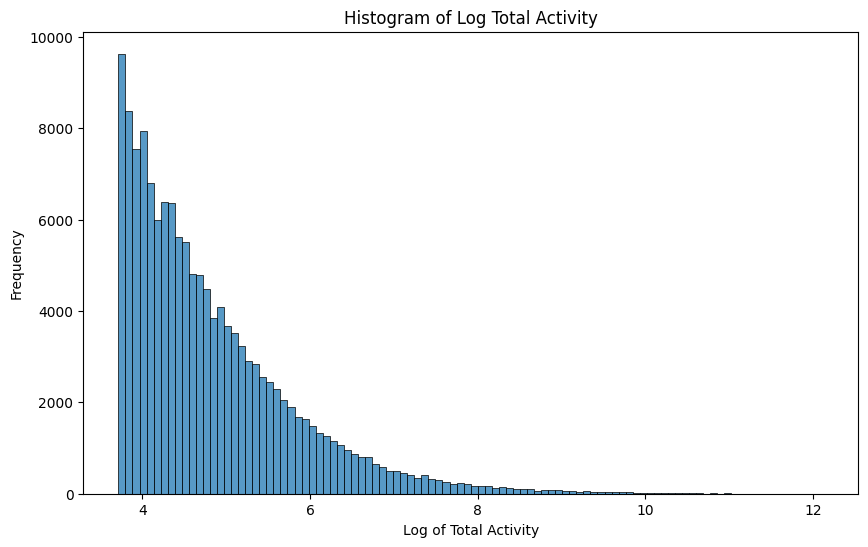

In [52]:
# The data is highly skewed so we log transform the data
# Log Transformation
active_users['LogTotalActivity'] = np.log(active_users['TotalActivity'])

# Histogram with Log Scale
plt.figure(figsize=(10, 6))
sns.histplot(active_users['LogTotalActivity'].dropna(), kde=False, bins=100)  # Adjust bins as needed
plt.title('Histogram of Log Total Activity')
plt.xlabel('Log of Total Activity')
plt.ylabel('Frequency')
plt.show()

In [53]:
active_users['TotalActivity'].describe()


count    140034.000000
mean        315.769206
std        1539.137048
min          41.000000
25%          59.000000
50%          95.000000
75%         200.000000
max      182907.000000
Name: TotalActivity, dtype: float64

# Next Steps

- Deal with missing values
- Find Topics and assign topics to posts
    - TF-IDF
    - LSH
- 

### Dealing with the missing values

**`df_comments`**

**`df_posts`**